In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup
import unicodedata
import re

import os
import acquire
import prepare

import time
import scipy.stats as stats

import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

In [2]:
# set default style for charts
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-dark-palette')

In [3]:
# change jupyter notebook setting to show all rows
pd.set_option('display.max_rows', None)

# Scrape

Here I will be writing the code to scrape github repository links

In [ ]:
link = 'https://github.com/search?p=1&q=bot&type=Repositories'

# make the request using the link of the first article and save html response to a variable
response = requests.get(link, headers={'user-agent': 'codeup data science hopper cohort'})
html = response.text
html

In [ ]:
# # create soup object
soup = BeautifulSoup(html)
print(soup.prettify())

In [ ]:
# # select items that fall under tag 'a', class 'v-align-middle'
repos = soup.select('a.v-align-middle')
repos

In [ ]:
# # get links within those items that are assigned tothe attribute 'href'
repos = [repo['href'] for repo in repos]
repos

In [ ]:
# commenting out this cell as it takes a while to run and I now have the csv saved locally

# use collector and for loop to gather github links, pausing every 5 for 60 seconds to prevent github excessive collection limitations 

# collector = []

# for i in range(31,61):
#     link = 'https://github.com/search?p={}&q=bot&type=Repositories'
#     response = requests.get(link.format(i), headers={'user-agent': 'codeup data science hopper cohort'})
#     print(response.status_code)
#     html = response.text
#     soup = BeautifulSoup(html)
#     repos = soup.select('a.v-align-middle')
#     repo_links = [repo['href'] for repo in repos]
#     collector += repo_links
#     print(collector[-1])

#     if i % 5 == 0:
#         time.sleep(60)
        
# collector

In [ ]:
# # check length of collector
# len(collector)

In [ ]:
# # use another for loop to remove the forward slash at the beginning of the links
# accumulator = []
# for item in collector:
#     accumulator.append(item[1:])
# accumulator

In [ ]:
# # check if there are any duplicates by converting to set and checking the length
# len(set(accumulator))

# Acquire

Pull in data that was cleaned, prepped, and saved to csv by a teammate

In [4]:
# pull in data
df = prepare.clean_and_filter_data()
df

,repo,language,readme_contents,clean,lemmatized
0,python-discord/bot,Python,# Python Utility Bot\n\n[![Discord][7]][8]\n[!...,python utility bot discord78 lint test12 build...,python utility bot discord78 lint test12 build...
1,microsoft/BotBuilder-Samples,JavaScript,\r\n# ![Bot Framework Samples](./docs/media/Bo...,bot framework samplesdocsmediabotframeworksamp...,bot framework samplesdocsmediabotframeworksamp...
2,GAwesomeBot/bot,JavaScript,# GAwesomeBot\n[![Travis Status](https://travi...,gawesomebot travis statushttpstravisciorggilbe...,gawesomebot travis statushttpstravisciorggilbe...
3,roughike/BottomBar,Java,# BottomBar (Deprecated)\n\nI don't have time ...,bottombar deprecated dont time maintain anymor...,bottombar deprecated dont time maintain anymor...
4,mithun-prasad/Bot,C#,# Developing and Deploying Intelligent Chat Bo...,developing deploying intelligent chat bots tra...,developing deploying intelligent chat bot trai...
5,boto/boto3,Python,===============================\nBoto3 - The A...,boto3 aws sdk python version python license bo...,boto3 aws sdk python version python license bo...
6,howdyai/botkit,TypeScript,# ![Botkit](banner.png)\n\n**Botkit is an open...,botkitbannerpng botkit open source developer t...,botkitbannerpng botkit open source developer t...
7,thinkpixellab/bot,C#,![BOT!](https://github.com/thinkpixellab/bot/r...,bothttpsgithubcomthinkpixellabbotrawmasternet4...,bothttpsgithubcomthinkpixellabbotrawmasternet4...
8,gunthercox/ChatterBot,Python,![ChatterBot: Machine learning in Python](http...,chatterbot machine learning pythonhttpsiimgurc...,chatterbot machine learning pythonhttpsiimgurc...
9,boto/boto,Python,####\nDeprecation notice\n####\n\n**This packa...,deprecation notice package longer maintained r...,deprecation notice package longer maintained r...


In [6]:
# create columns with character and word counts of readme text
df = df.assign(character_count= df.lemmatized.str.len(), 
          word_count=df.lemmatized.str.split().apply(len))

,repo,language,readme_contents,clean,lemmatized,character_count,word_count
0,python-discord/bot,Python,# Python Utility Bot\n\n[![Discord][7]][8]\n[!...,python utility bot discord78 lint test12 build...,python utility bot discord78 lint test12 build...,983,53
1,microsoft/BotBuilder-Samples,JavaScript,\r\n# ![Bot Framework Samples](./docs/media/Bo...,bot framework samplesdocsmediabotframeworksamp...,bot framework samplesdocsmediabotframeworksamp...,16954,1070
2,GAwesomeBot/bot,JavaScript,# GAwesomeBot\n[![Travis Status](https://travi...,gawesomebot travis statushttpstravisciorggilbe...,gawesomebot travis statushttpstravisciorggilbe...,1756,134
3,roughike/BottomBar,Java,# BottomBar (Deprecated)\n\nI don't have time ...,bottombar deprecated dont time maintain anymor...,bottombar deprecated dont time maintain anymor...,11295,904
4,mithun-prasad/Bot,C#,# Developing and Deploying Intelligent Chat Bo...,developing deploying intelligent chat bots tra...,developing deploying intelligent chat bot trai...,1793,240
5,boto/boto3,Python,===============================\nBoto3 - The A...,boto3 aws sdk python version python license bo...,boto3 aws sdk python version python license bo...,3693,385
6,howdyai/botkit,TypeScript,# ![Botkit](banner.png)\n\n**Botkit is an open...,botkitbannerpng botkit open source developer t...,botkitbannerpng botkit open source developer t...,3007,209
7,thinkpixellab/bot,C#,![BOT!](https://github.com/thinkpixellab/bot/r...,bothttpsgithubcomthinkpixellabbotrawmasternet4...,bothttpsgithubcomthinkpixellabbotrawmasternet4...,1595,182
8,gunthercox/ChatterBot,Python,![ChatterBot: Machine learning in Python](http...,chatterbot machine learning pythonhttpsiimgurc...,chatterbot machine learning pythonhttpsiimgurc...,4092,319
9,boto/boto,Python,####\nDeprecation notice\n####\n\n**This packa...,deprecation notice package longer maintained r...,deprecation notice package longer maintained r...,4255,556


# Split

Use a function split data into three data sets before exploring

In [7]:
# use function to split data into train, validate, and test
train, validate, test = prepare.split_data(df)
train.shape, validate.shape, test.shape

((126, 7), (54, 7), (45, 7))

# Explore

I will be looking into bigrams and trigrams of the lemmatized readme content by programming language to see if there are any differences/commonalities and determine if those can be used to predict the programming language base on readme content.

In [8]:
# check data
train.head()

,repo,language,readme_contents,clean,lemmatized,character_count,word_count
41,facebookarchive/mention-bot,JavaScript,** THIS REPO HAS BEEN ARCHIVED AND IS NO LONGE...,repo archived longer actively maintained menti...,repo archived longer actively maintained menti...,6845,801
117,pocheshire/BottomNavigationBar,C#,"# BottomNavigationBar\n<img src=""https://raw.g...",bottomnavigationbar img srchttpsrawgithubuserc...,bottomnavigationbar img srchttpsrawgithubuserc...,6182,523
167,CrazyBotsz/Adv-Auto-Filter-Bot,Python,"# Adv Auto Filter Bot\r\n\r\n<p align=""center""...",adv auto filter bot p aligncenter hrefhttpsgit...,adv auto filter bot p aligncenter hrefhttpsgit...,419,21
110,jagrit007/Telegram-CloneBot,Python,# Why?\nFor all my friends using my TDs who no...,friends using tds need store everything instea...,friend using tds need store everything instead...,3489,407
26,kyb3r/modmail,Python,"<div align=""center"">\n <img src=""https://i.im...",div aligncenter img srchttpsiimgurcomo558qnqpn...,div aligncenter img srchttpsiimgurcomo558qnqpn...,7937,652


In [9]:
# check the language value counts
train.language.value_counts()

Python        58
JavaScript    32
TypeScript    13
Java          12
C#            11
Name: language, dtype: int64

In [10]:
# combine all lemmatized words by language
python_words = ' '.join(train.lemmatized[train.language == 'Python'].astype(str))
javascript_words = ' '.join(train.lemmatized[train.language == 'JavaScript'].astype(str))
c_words = ' '.join(train.lemmatized[train.language == 'C#'].astype(str))
java_words = ' '.join(train.lemmatized[train.language == 'Java'].astype(str))
typescript_words = ' '.join(train.lemmatized[train.language == 'TypeScript'].astype(str))

In [11]:
# use ngrams to make a list of bigrams by language
top20_python_bigrams = pd.Series(nltk.ngrams(python_words.split(), 2)).value_counts().head(20)
top20_javascript_bigrams = pd.Series(nltk.ngrams(javascript_words.split(), 2)).value_counts().head(20)
top20_c_bigrams = pd.Series(nltk.ngrams(c_words.split(), 2)).value_counts().head(20)
top20_java_bigrams = pd.Series(nltk.ngrams(java_words.split(), 2)).value_counts().head(20)
top20_typescript_bigrams = pd.Series(nltk.ngrams(typescript_words.split(), 2)).value_counts().head(20)

In [13]:
bigrams_df = pd.DataFrame(top20_python_bigrams).reset_index().rename(columns={'index':'python_bigrams', 0:'p_count'})
bigrams_df.head()

,python_bigrams,p_count
0,"(pip, install)",53
1,"(service, account)",28
2,"(git, clone)",24
3,"(set, true)",22
4,"(r, requirementstxt)",22


## What are the top 5 python bigrams?

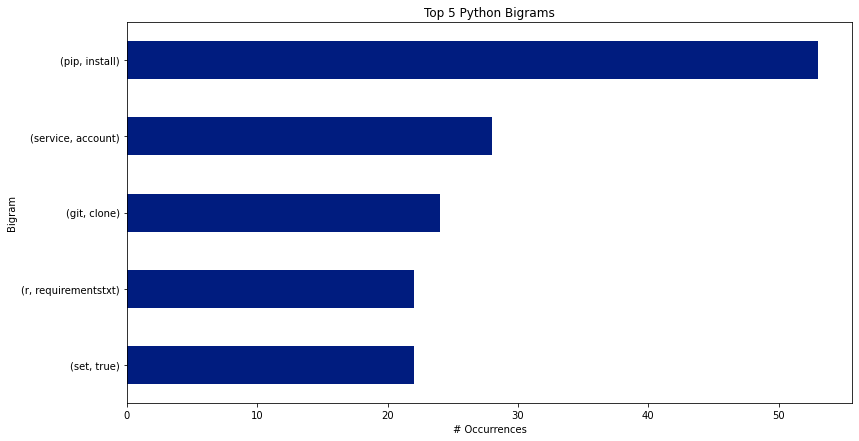

In [14]:
# plot out top 5 python bigrams
top20_python_bigrams.head().sort_values().plot.barh()

plt.title('Top 5 Python Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurrences')
ticks, _ = plt.yticks()

## What are the top 5 javascript bigrams?

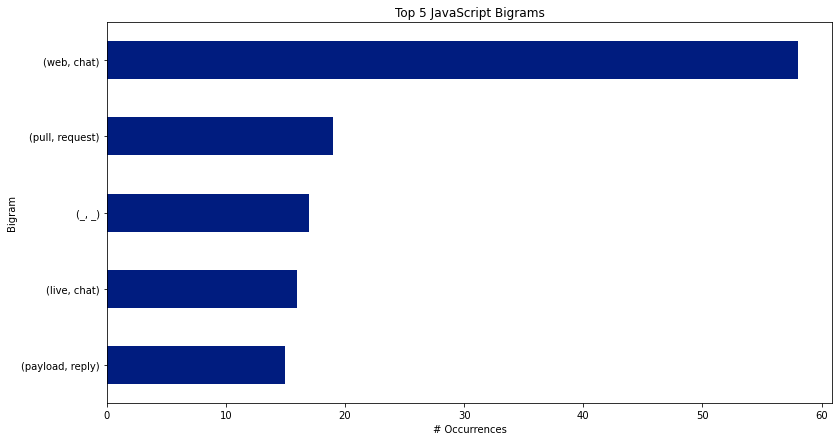

In [15]:
# plot out top 5 javascript bigrams
top20_javascript_bigrams.head().sort_values().plot.barh()

plt.title('Top 5 JavaScript Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurrences')
ticks, _ = plt.yticks()

## What are the top 5 C# bigrams?

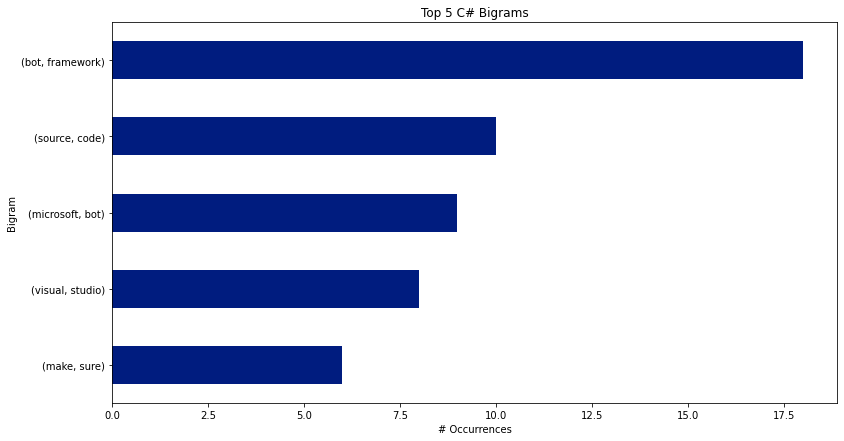

In [16]:
# plot out top 5 C# bigrams
top20_c_bigrams.head().sort_values().plot.barh()

plt.title('Top 5 C# Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurrences')
ticks, _ = plt.yticks()

## What are the top 5 java bigrams?

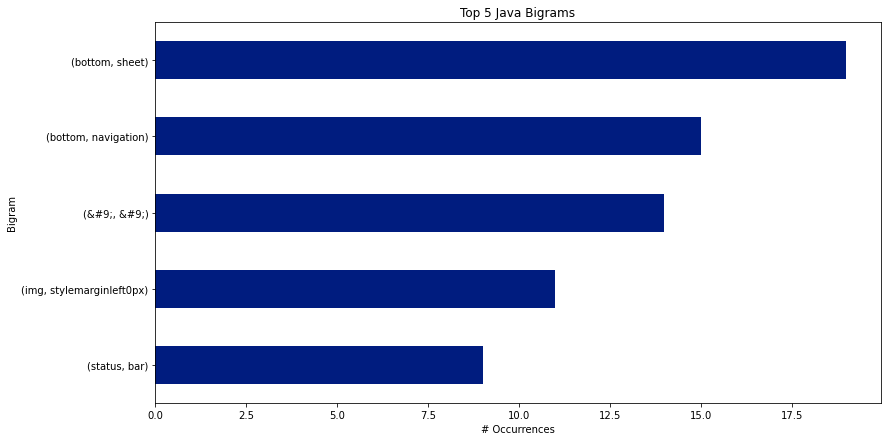

In [17]:
# plot out top 5 java bigrams
top20_java_bigrams.head().sort_values().plot.barh()

plt.title('Top 5 Java Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurrences')
ticks, _ = plt.yticks()

## What are the top 5 typescript bigrams?

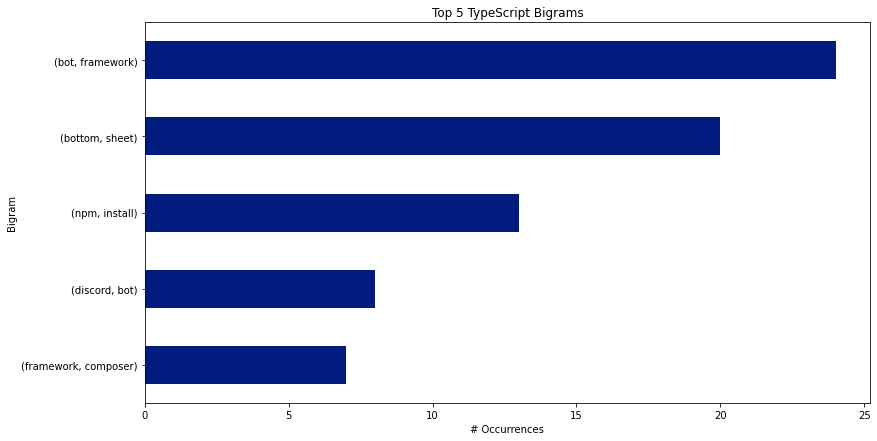

In [18]:
# plot out top 5 typescript bigrams
top20_typescript_bigrams.head().sort_values().plot.barh()

plt.title('Top 5 TypeScript Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# Occurrences')
ticks, _ = plt.yticks()

In [19]:
# create one dataframe that has all the bigrams, their count, and language
p_df = top20_python_bigrams.reset_index().rename(columns={'index':'bigram', 0:'count'}).assign(language = 'python')
js_df = top20_javascript_bigrams.reset_index().rename(columns={'index':'bigram', 0:'count'}).assign(language = 'javascript')
c_df = top20_c_bigrams.reset_index().rename(columns={'index':'bigram', 0:'count'}).assign(language = 'c#')
j_df = top20_java_bigrams.reset_index().rename(columns={'index':'bigram', 0:'count'}).assign(language = 'java')
t_df = top20_typescript_bigrams.reset_index().rename(columns={'index':'bigram', 0:'count'}).assign(language = 'typescript')
bigrams_df = p_df.append([js_df, c_df, j_df, t_df], ignore_index=True)
bigrams_df

,bigram,count,language
0,"(pip, install)",53,python
1,"(service, account)",28,python
2,"(git, clone)",24,python
3,"(set, true)",22,python
4,"(r, requirementstxt)",22,python
5,"(install, r)",22,python
6,"(make, sure)",21,python
7,"(required, hotkey)",19,python
8,"(summarybclick, detailsbsummary)",18,python
9,"(pip3, install)",18,python


In [20]:
# check that all 20 for all languages are accounted for
bigrams_df.shape

(100, 3)

In [22]:
# check for any duplicate values where bigram is in top 20 for 2 or more languages
dupes = bigrams_df.bigram[bigrams_df.bigram.duplicated()]
dupes_df = pd.DataFrame(columns=['bigram', 'count', 'language'])
for val in dupes.unique():
    dupes_df = dupes_df.append(bigrams_df[bigrams_df.bigram == val], ignore_index=True)
dupes_df

,bigram,count,language
0,"(bot, framework)",11,javascript
1,"(bot, framework)",18,c#
2,"(bot, framework)",24,typescript
3,"(make, sure)",21,python
4,"(make, sure)",6,c#
5,"(git, clone)",24,python
6,"(git, clone)",4,c#
7,"(bottom, sheet)",19,java
8,"(bottom, sheet)",20,typescript
9,"(npm, install)",13,javascript


C & typescript share 4, javascript & typescript share 2, python & c share 2, java & typescript share 1

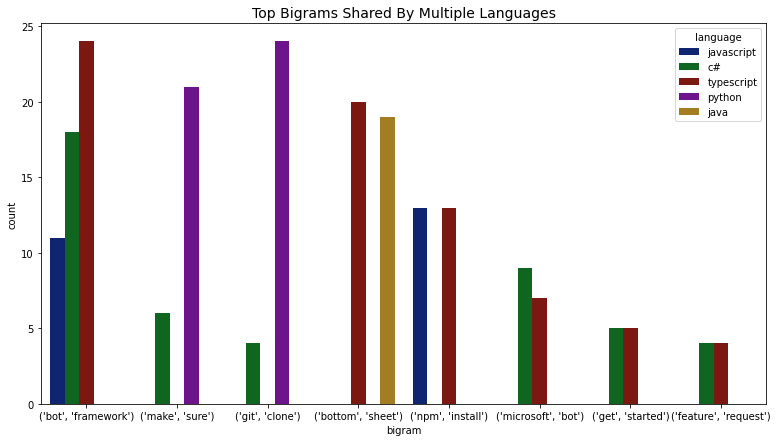

In [28]:
# try to make a bar plot of these duplicates
sns.barplot(x='bigram', y='count', hue='language', data=dupes_df)
plt.title('Top Bigrams Shared By Multiple Languages', size=14);

## Takeaways:

Java has only one bigram in common with another language which could indicate it is much different than the other languages. C# and TypeScript must be the most alike as they share 4 bigrams. JavaScript & TypeScript share two & Python & C# share two. 

# Is there a difference in average repository word count by language?

In [30]:
ch_word_count = train.groupby('language')[['character_count', 'word_count']].agg('mean').reset_index()
ch_word_count

,language,character_count,word_count
0,C#,3984.454545,275.818182
1,Java,3330.000000,301.250000
2,JavaScript,3138.843750,335.531250
3,Python,2995.637931,322.000000
4,TypeScript,2923.307692,248.076923


In [31]:
ch_word_count = ch_word_count.rename(columns={'character_count':'mean_character_count',
                                              'word_count':'mean_word_count'})
ch_word_count

,language,mean_character_count,mean_word_count
0,C#,3984.454545,275.818182
1,Java,3330.000000,301.250000
2,JavaScript,3138.843750,335.531250
3,Python,2995.637931,322.000000
4,TypeScript,2923.307692,248.076923


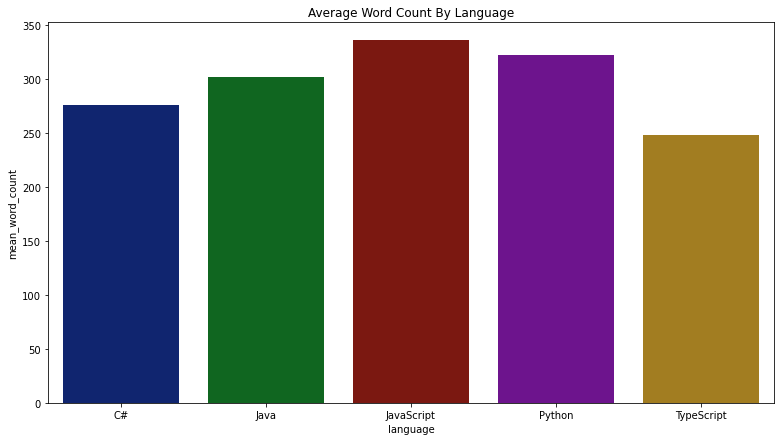

In [36]:
# plot mean word count by language
sns.barplot(x='language', y='mean_word_count', data=ch_word_count)
plt.title('Average Word Count By Language');

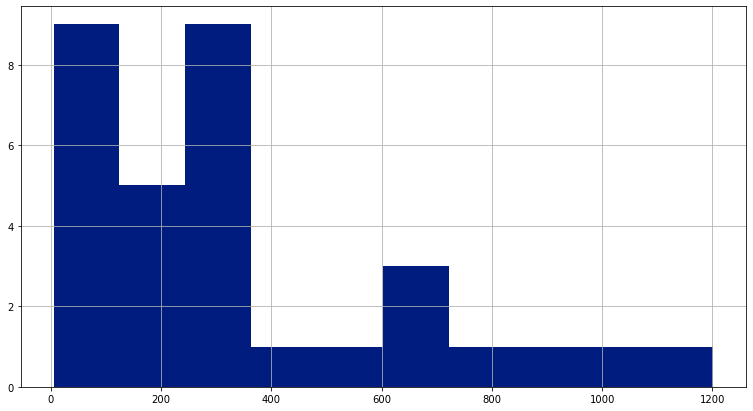

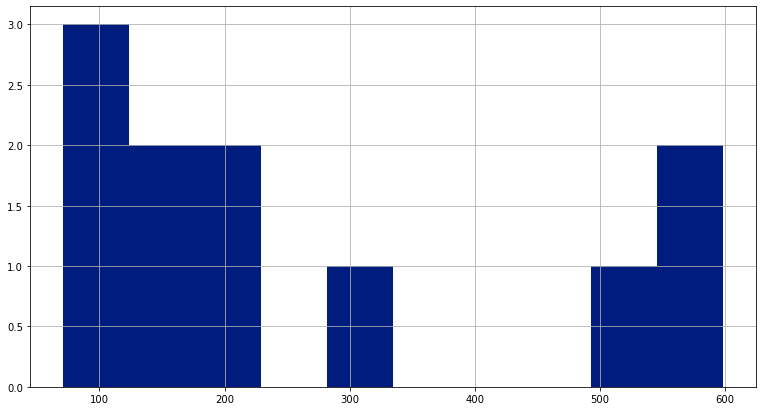

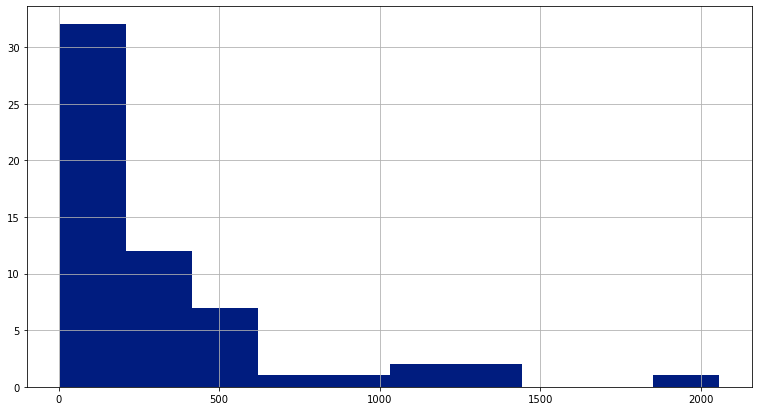

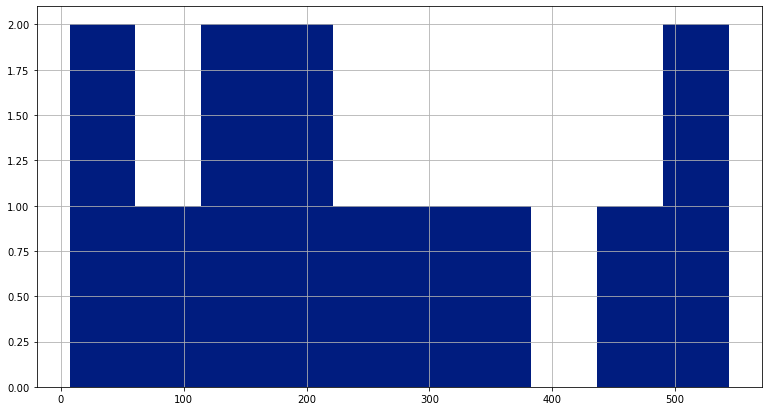

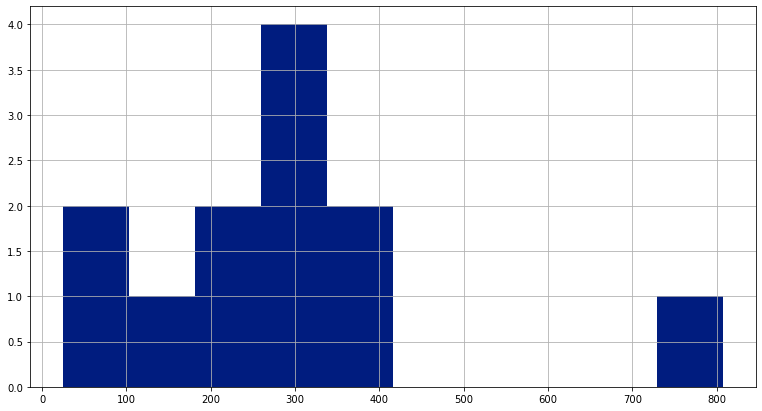

In [49]:
# check distribution of word count by language
for lang in train.language.unique():
    train.word_count[train.language == lang].hist()
    plt.show()

### JavaScript repositories have the largest average word count followed closely by Python. I am going to conduct statistical testing using the Kruskal-Wallis test. Variables are not normally distributed, however, normal distribution assumption is met through the Central Limit Theorum. 
### Null hypothesis: There is no statistically significant difference in mean word count by language. 
### Alternate hypothesis: There is a statistically significant difference in mean word count by language.

In [55]:
# separate word count by language and conduct statistical testing
p = train.word_count[train.language == 'Python']
js = train.word_count[train.language == 'JavaScript']
c = train.word_count[train.language == 'C#']
j = train.word_count[train.language == 'Java']
t = train.word_count[train.language == 'TypeScript']

# set alph
alpha = .05

# compute statistics
t, p = stats.kruskal(p, js, c, j, t)

print(t, p)
if p > alpha:
    print('We fail to reject the null hypothesis')
else:
    print('We reject the null hypothesis')

1.9698014913510635 0.7413133749179448
We fail to reject the null hypothesis


### Statistical testing confirms there is no significant difference in the mean word count by language. This likely would not be a good feature for predicting programming language.

### Data Dictionary
Target | Dtype | Description
:-- | :-- | :--
`language` | string | description

<hr>

Model Feature | Dtype | Description
:-- | :-- | :--
`repo` | string | Name of GitHub repo used to extract data
`readme_contents` | string | Repo's README.md 
`clean` | string | remove any inconsistencies in unicode characters from readme_contents. Converted the resulting string to the ASCII character set and turned the resulting bytes object back into a string 
`lemmatized` | object | turns data in 'clean' into root words, also known as the lemma 
`word_count` | int64 | counts the words in the 'lemmatized' column 
`char_count` | int64 | description
`var_name` | datatype | description

<hr>

Language | Description
:-- | :-- 
`Python` |  an interpreted, object-oriented, high-level programming language with dynamic semantics
`JavaScript` | object-oriented computer programming language commonly used to create interactive effects within web browsers
`C#` |  is a general-purpose, multi-paradigm programming language
`TypeScript` | language developed and maintained by Microsoft. It is a strict syntactical superset of JavaScript and adds optional static typing to the language
`Java` | Java is a general-purpose programming language that is class-based and object-oriented